In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib
matplotlib.rcParams["image.interpolation"] = None
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from glob import glob
from tqdm import tqdm
from tifffile import imread
from csbdeep.utils import Path, download_and_extract_zip_file

from harmonicnet import fill_label_holes, random_label_cmap
from harmonicnet import relabel_image_fourier
from harmonicnet.matching import matching_dataset

from stardist import relabel_image_stardist

np.random.seed(42)
lbl_cmap = random_label_cmap()

C:\Users\User\AppData\Local\Temp/ipykernel_5360/507762865.py:4: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams["image.interpolation"] = None


# Download data

In [2]:
download_and_extract_zip_file(
    url       = 'https://github.com/mpicbg-csbd/stardist/releases/download/0.1.0/dsb2018.zip',
    targetdir = 'data',
    verbose   = 1,
)

Files found, nothing to download.


In [3]:
X = sorted(glob('data/dsb2018/train/images/*.tif'))
Y = sorted(glob('data/dsb2018/train/masks/*.tif'))
assert all(Path(x).name==Path(y).name for x,y in zip(X,Y))

Load only a small subset

In [4]:
X, Y = X[:10], Y[:10]

In [5]:
X = list(map(imread,X))
Y = list(map(imread,Y))

# Example image

In [6]:
i = min(4, len(X)-1)
img, lbl = X[i], fill_label_holes(Y[i])
assert img.ndim in (2,3)
img = img if img.ndim==2 else img[...,:3]
# assumed axes ordering of img and lbl is: YX(C)

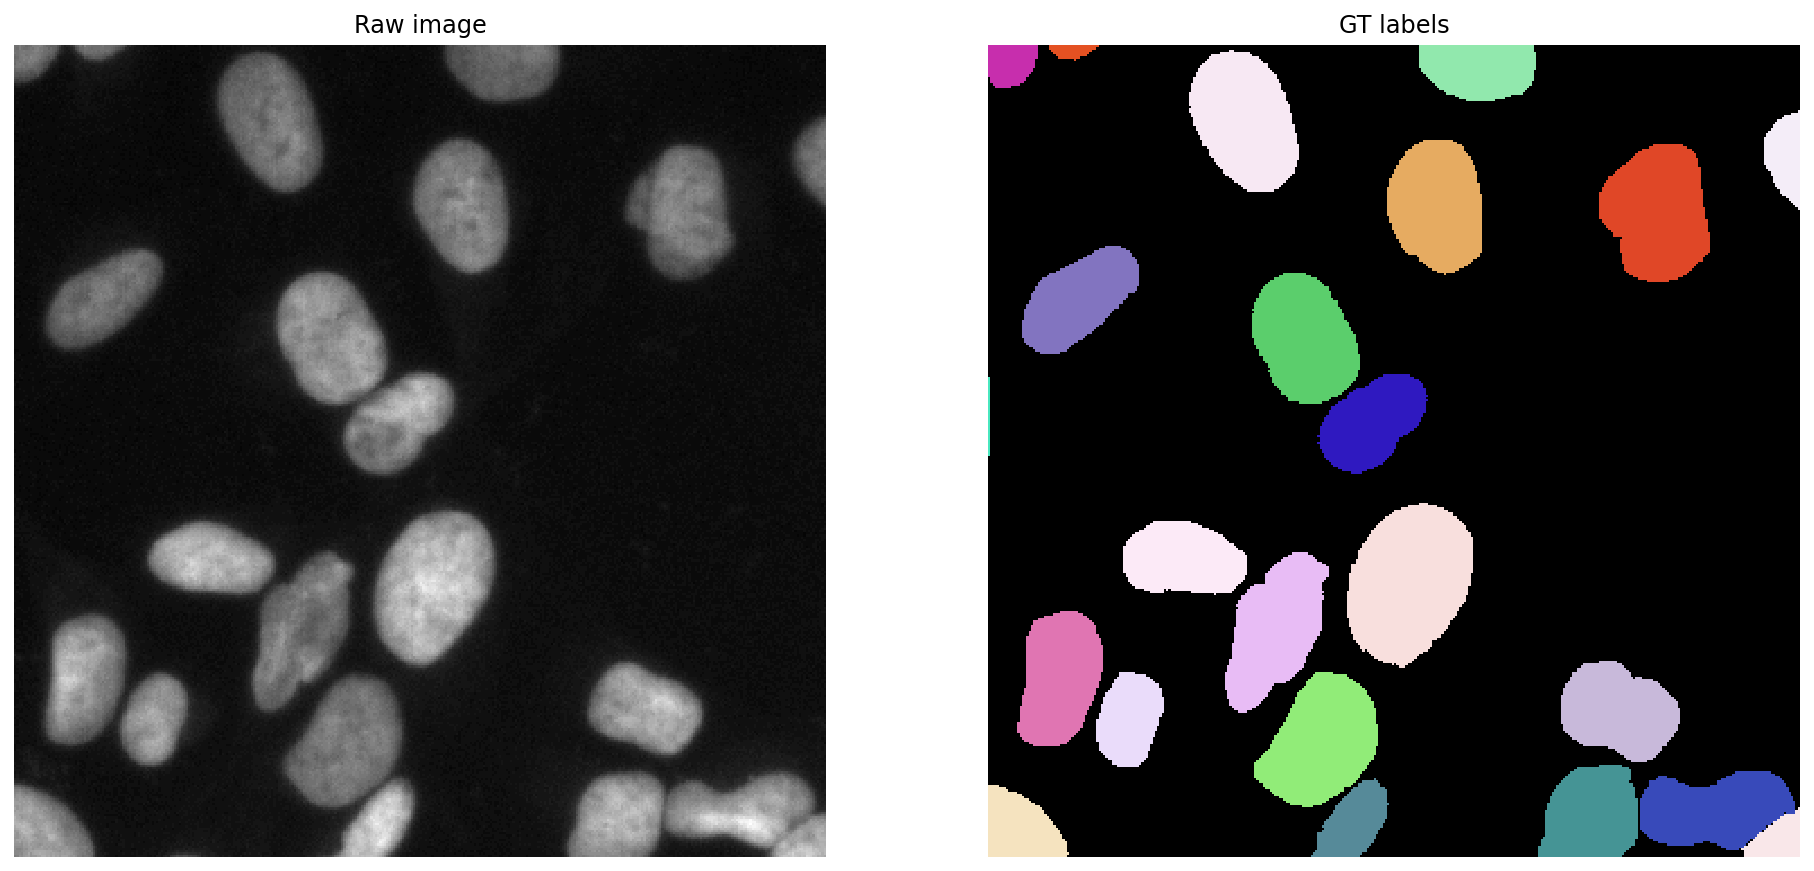

In [7]:
plt.figure(figsize=(16,10))
plt.subplot(121); plt.imshow(img,cmap='gray');   plt.axis('off'); plt.title('Raw image')
plt.subplot(122); plt.imshow(lbl,cmap=lbl_cmap); plt.axis('off'); plt.title('GT labels')
None;

# Fitting ground-truth labels with star-convex polygons vs Fourier descriptors

In [8]:
recon_stardist = relabel_image_stardist(lbl, n_rays = 9)
recon_harmonic = relabel_image_fourier(lbl, n_coeffs = 9, contoursize=100)

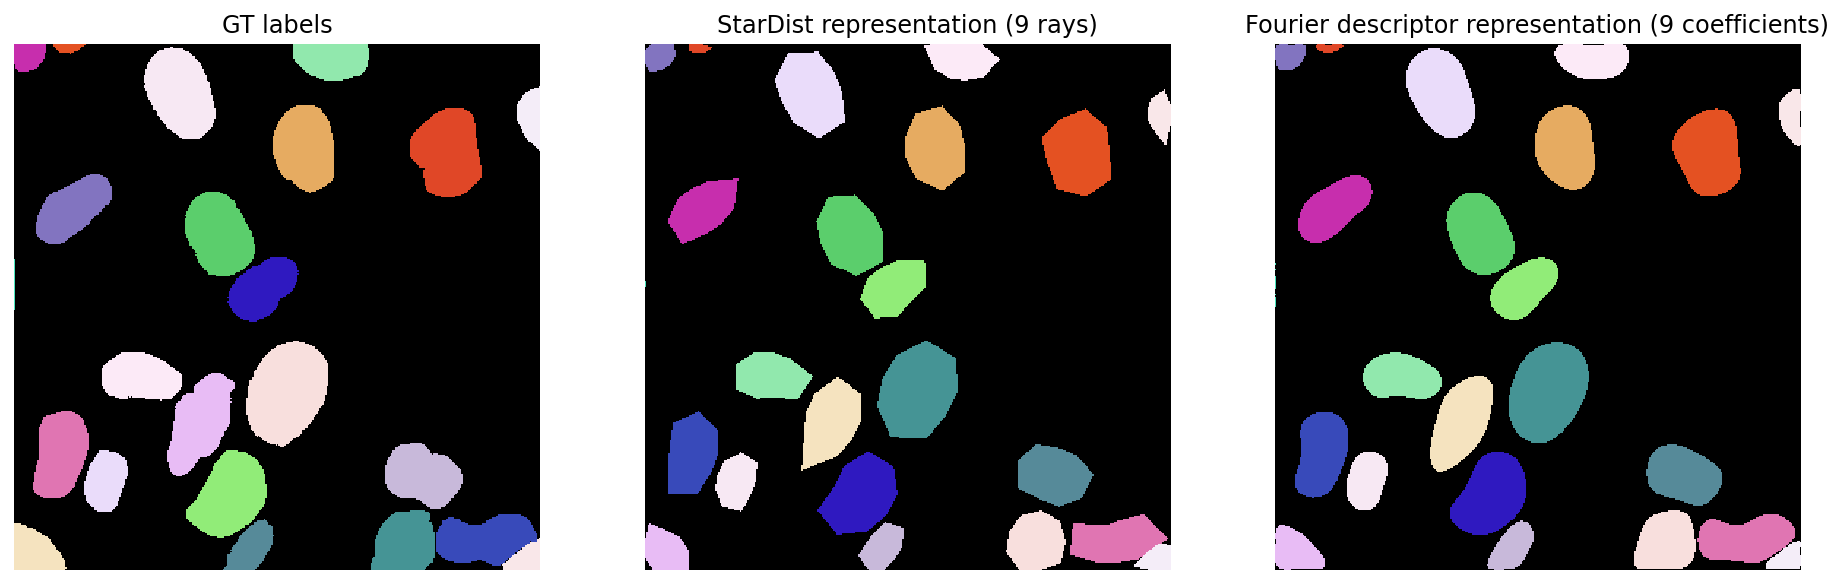

In [9]:
plt.figure(figsize=(16,10))
plt.subplot(131); plt.imshow(lbl,cmap=lbl_cmap); plt.axis('off'); plt.title('GT labels')
plt.subplot(132); plt.imshow(recon_stardist,cmap=lbl_cmap); plt.axis('off'); plt.title('StarDist representation (9 rays)')
plt.subplot(133); plt.imshow(recon_harmonic,cmap=lbl_cmap); plt.axis('off'); plt.title('Fourier descriptor representation (9 coefficients)')
plt.show()